## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import statsmodels.api as sm
#import statsmodels.formula.api as smf
#import statsmodels.graphics as sg
import math
from scipy import stats
from __future__ import division

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


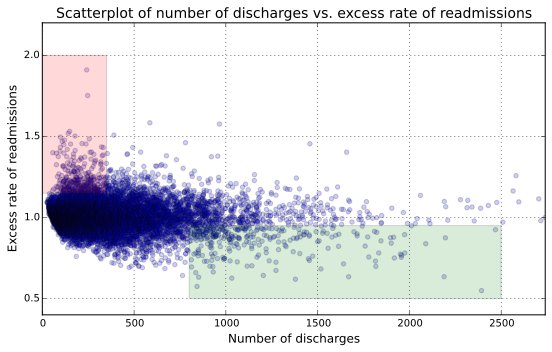

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

***

**A. A brief critique of the analysis**
+ Generally, the initial observations are correct.
+ A more appropriate analysis of this data would use regression analysis, which will take into account all data.
    + The null hypothesis traditionally tested in regression analysis is that there is no correlation between the dependent and independent variables, *i.e.* the exact converse of the conclusion made in the preliminary report, "There is a significant correlation between hospital capacity (number of discharges) and readmission rates."
+ The shaded areas in the plot are confusing. They don't represent the two groups actually studied in the statistical analysis.
+ Based only on this analysis, I do not think that one can fairly make policy recommendations. The number of discharges may simply be correlated with the underlying health of the population that the hospital serves. 
    + For instance, it may be that rural hospitals have a lower number of discharges as they serve a smaller population, and also serve a generally older and less healthy population. A simple check using these data would be to control for population density in the state in which the hospital is located.
    + A more exhaustive study should control for various indicators of the health of the population the hospital serves, though this would require finding more data.
    
**B. Statistical analysis of the preliminary report**
+ First claim: the low-discharge readmission rate is higher than the high-discharge readmission rate.
    + Null hypothesis: low-discharge readmission rate and high-discharge readmission rate are the same.
    + Alternative hypothesis: low-discharge readmission rate > high-discharge readmission rate.
    + 0.7% probability that these or more extreme data could come from a situation where the null hypothesis is true.
    + Using an $\alpha = 1\%$, the null hypothesis is rejected.
+ Second claim: the proportion of hospitals in the low-discharge group with readmission rate greater than 1 is higher than the same proportion in the high-discharge group.
    + Null hypothesis: the proportion of hospitals in the low-discharge group with readmission rate greater than 1 and the same proportion in the high-discharge group are the same.
    + Alternative hypothesis: proportion of hospitals in the low-discharge group with readmission rate greater than 1 > same proportion in the high-discharge group.
    + $7 \times 10^{-10} \%$ probability that these or more extreme data could come from a situation where the null hypothesis is true.
    + Using an $\alpha = 1\%$, the null hypothesis is rejected.
    + This finding is highly statistically significant.


**C. Regression analysis**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
+ For an increase in discharges of 2000, the readmission rate decreases by about 0.06.
+ This correlation is highly statistically significant, with a probability of only $1.2 \times 10^{-25}$ that these or more extreme data could come from a situation where there is actually no correlation between number of discharges and readmission rates.

**D. Conclusions**

While the correlation is highly statistically significant, the number of discharges doesn't account for *that* much of the variation in readmission rates. An increase of 1000 discharges only decreases the readmission rate by about 0.03 on average, which is only about 1/3 of a standard deviation of our data readmission rate data.  There are clearly many more factors involved with variations in readmission rates, so any policy recommendations that we make should not be given the highest priority until we better understand the causes behind readmission rates and can see if there may be more effective interventions.

We also should do more analysis before jumping to conclusions about policy recommendations. Correlation does not imply causation, and we should try to control for things that are (largely) out of a hospital's control, such as the underlying health of the population. However, these data do not include measures of the underlying health of the population, so we will have to look to other data sources in order to make this analysis.

***

### Plot summerizing findings

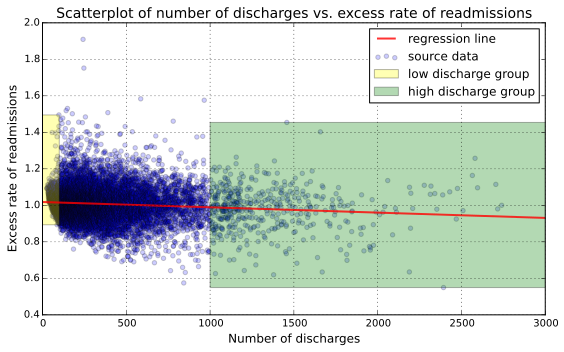

In [83]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = cleaner_hospital['Number of Discharges'].as_matrix() 
y = cleaner_hospital['Excess Readmission Ratio'].as_matrix()

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2,label='source data')

ax.fill_between([0,100], lowdischarge['Excess Readmission Ratio'].min(), lowdischarge['Excess Readmission Ratio'].max(), facecolor='yellow', alpha = .3, interpolate=True, label='low discharge')
ax.fill_between([1000,highdischarge['Number of Discharges'].max()], highdischarge['Excess Readmission Ratio'].min(), highdischarge['Excess Readmission Ratio'].max(), facecolor='green', alpha = .3, interpolate=True,label='high discharge')

linx=np.linspace(0,3000,num=5)
ax.plot(linx, disres.params[0]*linx+disres.params[1],alpha=0.8, color='red',lw=2,label='regression line')

ax.set_xlim([0, 3000]) #There are some big outliers
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
handles, labels = ax.get_legend_handles_labels()
p1 = plt.Rectangle((0, 0), 1, 1, fc="yellow",alpha=.3)
p2 = plt.Rectangle((0, 0), 1, 1, fc="green",alpha=.3)
handles=handles+[p1,p2]
labels=labels+['low discharge group','high discharge group']
ax.legend(handles,labels)

ax.grid(True)
fig.tight_layout()

In [11]:
cleaner_hospital=clean_hospital_read_df.dropna(subset=['Number of Discharges','Excess Readmission Ratio'])

### Regression analysis

In [13]:
dismod=sm.OLS(cleaner_hospital['Excess Readmission Ratio'],sm.add_constant(cleaner_hospital['Number of Discharges'],prepend=False))

In [15]:
disres=dismod.fit()
disres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     110.1
Date:                      Thu, 29 Oct 2015   Prob (F-statistic):           1.22e-25
Time:                              11:27:57   Log-Likelihood:                 11178.
No. Observations:                     11497   AIC:                        -2.235e+04
Df Residuals:                         11495   BIC:                        -2.234e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Number of Discharges -2.901e-05   2.76e-06    -10.492      0.000     -3.44e-05 -2.36e-05
const                    1.0181      0.001    769.664      0.000         1.016     1.021
==============================================================================
Omnibus:                     1666.940   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.197
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       6.532   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
disres.pvalues

Number of Discharges    1.222547e-25
const                   0.000000e+00
dtype: float64

In [25]:
disres.params[0]*2000

-0.058021034661096767

### Statistical significance of the preliminary report

In [12]:
lowdischarge=cleaner_hospital[cleaner_hospital['Number of Discharges']<100]
highdischarge=cleaner_hospital[cleaner_hospital['Number of Discharges']>1000]

#### Means of the two groups

In [41]:
SE=math.sqrt(lowdischarge['Excess Readmission Ratio'].std()/lowdischarge['Excess Readmission Ratio'].count()+highdischarge['Excess Readmission Ratio'].std()/highdischarge['Excess Readmission Ratio'].count())
mdiff=highdischarge['Excess Readmission Ratio'].mean()-lowdischarge['Excess Readmission Ratio'].mean()
stats.t.cdf(mdiff/SE,min(lowdischarge['Excess Readmission Ratio'].count(),highdischarge['Excess Readmission Ratio'].count())-1)

0.0067458849569449692

#### Proportion over 1

In [38]:
lowprop=(lowdischarge['Excess Readmission Ratio'].map(math.ceil)-1).mean()
highprop=(highdischarge['Excess Readmission Ratio'].map(math.ceil)-1).mean()
print(lowprop)
print(highprop)

0.632154882155
0.444924406048


In [57]:
groupeddata=lowdischarge.append(highdischarge)
groupprop=(groupeddata['Excess Readmission Ratio'].map(math.ceil)-1).mean()
SEprop=math.sqrt((1-groupprop)*groupprop*(1/lowdischarge.shape[0]+1/highdischarge.shape[0]))

In [58]:
tscore=(lowprop-highprop)/SEprop
tscore

6.9232990303401474

In [59]:
degfree=min(lowdischarge['Excess Readmission Ratio'].count(),highdischarge['Excess Readmission Ratio'].count())-1
degfree

462

In [60]:
(1-stats.t.cdf(tscore,degfree))

7.4156236706812706e-12

In [32]:
print groupeddata.shape
print lowdischarge.shape
print highdischarge.shape

(1651, 12)
(1188, 12)
(463, 12)


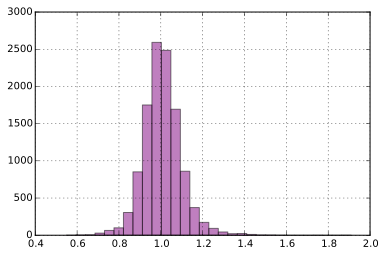

In [76]:
cleaner_hospital['Excess Readmission Ratio'].hist(bins=30,alpha=0.5,color='purple')

In [62]:
disres.params[0]*1000/cleaner_hospital['Excess Readmission Ratio'].std()

-0.31545423654166704